In [ ]:
import re
from glob import glob
from google.colab import drive

drive.mount('/content/drive')

import pandas as pd
path = glob('/content/drive/MyDrive/new.csv')
spotify_data = pd.read_csv(path[0])

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
from sklearn.model_selection import train_test_split, GridSearchCV, validation_curve
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
import statsmodels.api as sm
import seaborn as sns
import time

EDA

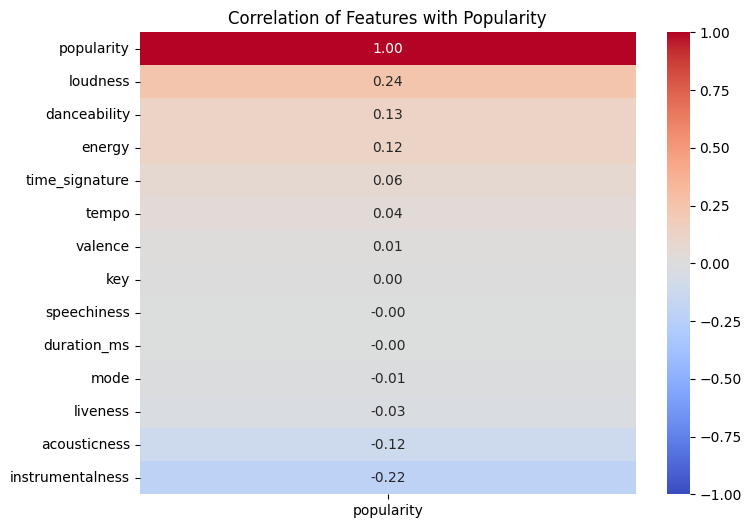

(        acousticness   danceability   duration_ms         energy  \
 count  130663.000000  130663.000000  1.306630e+05  130663.000000   
 mean        0.342500       0.581468  2.126331e+05       0.569196   
 std         0.345641       0.190077  1.231551e+05       0.260312   
 min         0.000000       0.000000  3.203000e+03       0.000000   
 25%         0.031600       0.459000  1.639225e+05       0.396000   
 50%         0.203000       0.605000  2.019010e+05       0.603000   
 75%         0.636000       0.727000  2.410475e+05       0.775000   
 max         0.996000       0.996000  5.610020e+06       1.000000   
 
        instrumentalness            key       liveness       loudness  \
 count     130663.000000  130663.000000  130663.000000  130663.000000   
 mean           0.224018       5.231894       0.194886      -9.974006   
 std            0.360328       3.602701       0.167733       6.544379   
 min            0.000000       0.000000       0.000000     -60.000000   
 25%        

In [ ]:
# Selecting only the numeric columns
data = spotify_data.select_dtypes(include=[np.number])

# Descriptive statistics
desc_stats = data.describe()

# Correlation matrix
corr_matrix = data.corr()

# Plotting correlations with popularity
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix[['popularity']].sort_values(by='popularity', ascending=False), annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation of Features with Popularity')
plt.show()

desc_stats, corr_matrix

Distributions of some key features

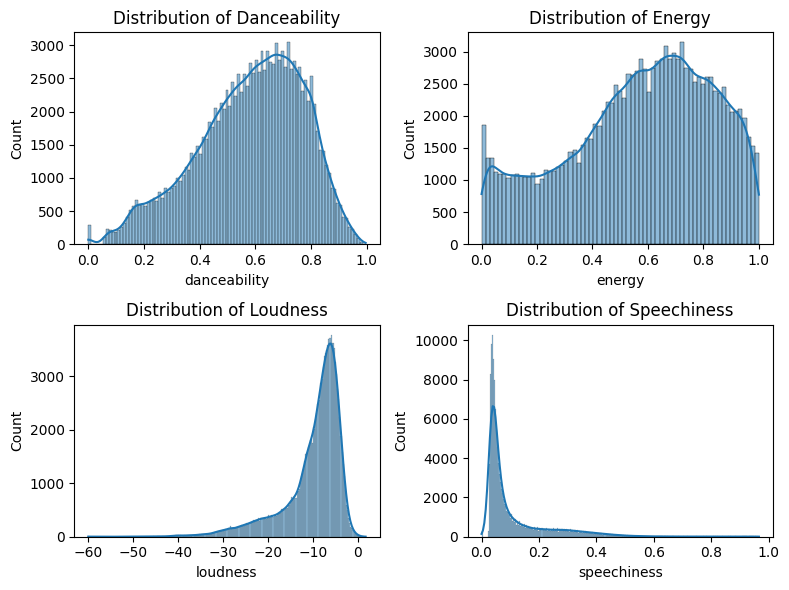

In [ ]:
# Plot distributions for some key variables
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

# Danceability
sns.histplot(data['danceability'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Danceability')

# Energy
sns.histplot(data['energy'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Energy')

# Loudness
sns.histplot(data['loudness'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Loudness')

# Speechiness
sns.histplot(data['speechiness'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Speechiness')

plt.tight_layout()
plt.show()

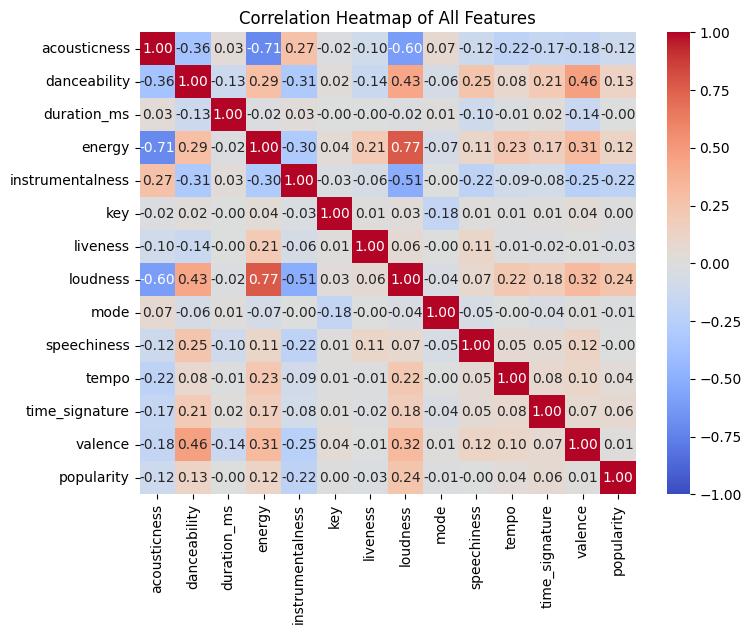

In [ ]:
# Correlation heatmap for all numeric features
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap of All Features')
plt.show()

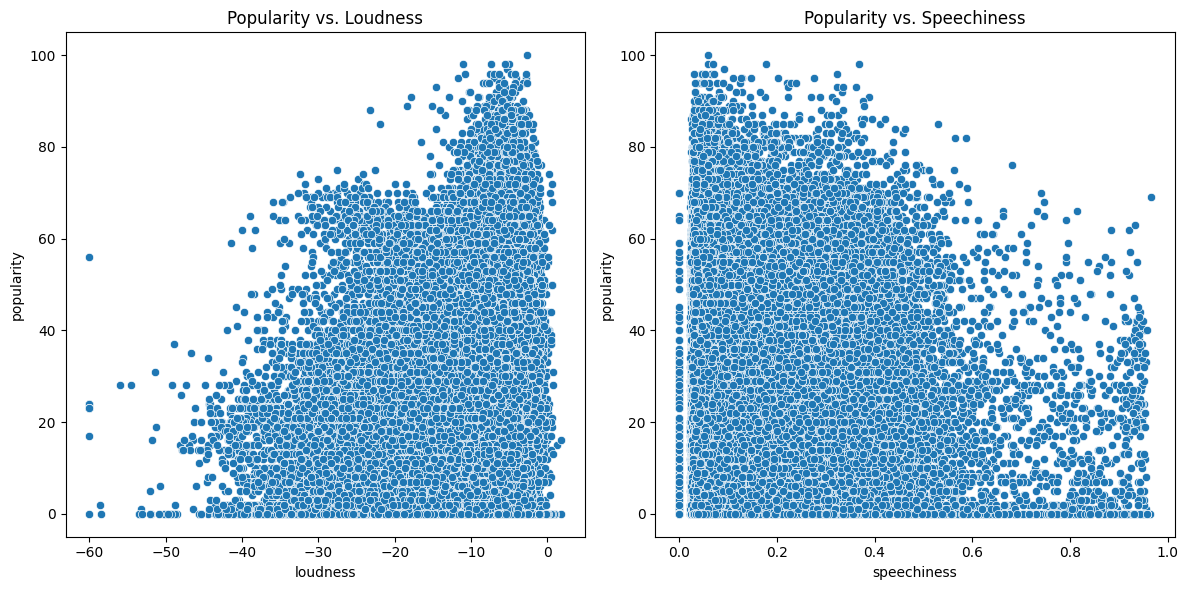

In [ ]:
# Scatter plots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Popularity vs. Loudness
sns.scatterplot(x=data['loudness'], y=data['popularity'], ax=axes[0])
axes[0].set_title('Popularity vs. Loudness')

# Popularity vs. Speechiness
sns.scatterplot(x=data['speechiness'], y=data['popularity'], ax=axes[1])
axes[1].set_title('Popularity vs. Speechiness')

plt.tight_layout()
plt.show()

OLS regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = spotify_data[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
                  'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
                  'duration_ms', 'time_signature']]
y = spotify_data['popularity']
X = sm.add_constant(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = sm.OLS(y_train, X_train).fit()

model_summary = model.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             popularity   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     761.0
Date:                Fri, 26 Apr 2024   Prob (F-statistic):               0.00
Time:                        15:40:17   Log-Likelihood:            -4.5525e+05
No. Observations:              104530   AIC:                         9.105e+05
Df Residuals:                  104516   BIC:                         9.107e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               35.9939      0.710     50.724      0.000      34.603      37.385
danceability         5.5811      0.405     13.766      0.000       4.786       6.376
energy              -6.4946      0.434    -14.970      0.000      -7.345      -5.644
key                 -0.0131      0.016     -0.794      0.427      -0.045       0.019
loudness             0.7826      0.017     47.103      0.000       0.750       0.815
mode                -0.2429      0.122     -1.989      0.047      -0.482      -0.004
speechiness         -5.9846      0.502    -11.919      0.000      -6.969      -5.000
acousticness         0.7332      0.252      2.906      0.004       0.239       1.228
instrumentalness    -7.0069      0.197    -35.528      0.000      -7.393      -6.620
liveness            -2.9983      0.370     -8.104      0.000      -3.724      -2.273
valence             -7.0113      0.268    -26.137      0.000      -7.537      -6.486
tempo               -0.0033      0.002     -1.631      0.103      -0.007       0.001
duration_ms      -1.025e-06   4.84e-07     -2.118      0.034   -1.97e-06   -7.66e-08
time_signature       0.7685      0.117      6.552      0.000       0.539       0.998
==============================================================================
Omnibus:                     4674.562   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4567.705
Skew:                           0.468   Prob(JB):                         0.00
Kurtosis:                       2.586   Cond. No.                     3.31e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.31e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Test RMSE of OLS

In [ ]:
# Predicting on the test data
y_pred = model.predict(X_test)

# Calculating the RMSE for the test data
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"The RMSE on the test data is: {rmse}")

The RMSE on the test data is: 18.796244517648333


Diagnostics

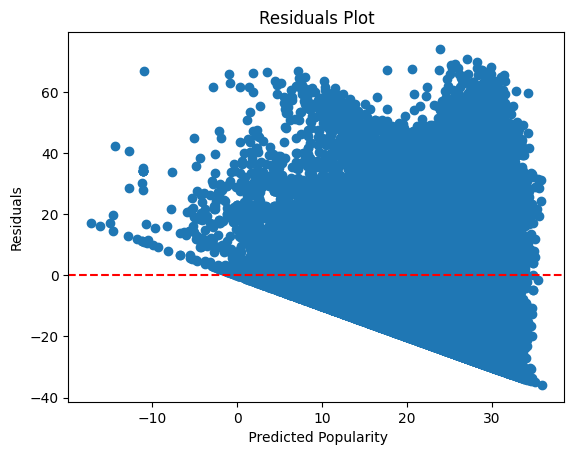

In [ ]:
#Residuals Plot
residuals = model.resid

plt.scatter(model.predict(), residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel(' Predicted Popularity')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

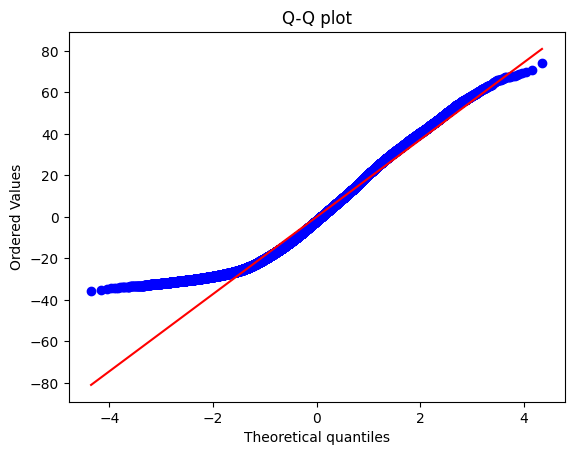

In [ ]:
# QQ Plot
import scipy.stats as stats
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q plot')
plt.show()

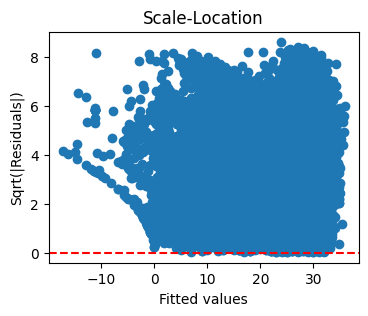

In [ ]:
# Scale-Location (Spread vs Level)
fig, ax = plt.subplots(figsize=(4, 3))
ax.scatter(model.fittedvalues, np.sqrt(np.abs(model.resid)))
ax.axhline(0, color="red", linestyle="--")
ax.set_xlabel('Fitted values')
ax.set_ylabel('Sqrt(|Residuals|)')
ax.set_title('Scale-Location')

plt.show()
#Plot suggests possible heteroscedasticity, as indicated by the changing spread of residuals

ANOVA

In [ ]:
# Constructing ANOVA table manually based on the OLS results
import numpy as np
import scipy.stats as stats

SST = np.sum((y - np.mean(y)) ** 2)
SSR = np.sum((model.predict(X) - np.mean(y)) ** 2)
SSE = np.sum((y - model.predict(X)) ** 2)

df_total = len(y) - 1
df_model = X.shape[1] - 1
df_residuals = df_total - df_model

MSR = SSR / df_model
MSE = SSE / df_residuals

F = MSR / MSE

p_value = 1 - stats.f.cdf(F, df_model, df_residuals)

anova_table = pd.DataFrame({
    "Source": ["Model", "Residual", "Total"],
    "DF": [df_model, df_residuals, df_total],
    "Sum of Squares": [SSR, SSE, SST],
    "Mean Square": [MSR, MSE, SST / df_total],
    "F": [F, np.nan, np.nan],
    "p-value": [p_value, np.nan, np.nan]
})

anova_table

,Source,DF,Sum of Squares,Mean Square,F,p-value
0,Model,13,4.399318e+06,338409.053619,953.745277,1.110223e-16
1,Residual,130649,4.635704e+07,354.821210,NaN,NaN
2,Total,130662,5.077655e+07,388.609895,NaN,NaN


Multicollinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to calculate VIF for each feature
def calculate_vif(X):
    VIF_data = pd.DataFrame()
    VIF_data['feature'] = X.columns
    VIF_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return VIF_data

# Excluding the intercept for VIF calculation
VIF_results = calculate_vif(X.drop('const', axis=1))
VIF_results

,feature,VIF
0,danceability,15.588020
1,energy,16.194444
2,key,3.164586
3,loudness,8.488658
4,mode,2.596074
5,speechiness,2.080770
6,acousticness,3.835770
7,instrumentalness,2.048302
8,liveness,2.646151
9,valence,5.492609


Ridge regression with cv

In [ ]:
X = spotify_data[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
                  'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
                  'duration_ms', 'time_signature']]

y = spotify_data['popularity']

alphas = np.logspace(-6, 6, 13)
ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True)
ridge_cv.fit(X, y)

best_alpha = ridge_cv.alpha_

cv_mse = np.mean(ridge_cv.cv_values_, axis=0)
ridge_para = pd.Series(ridge_cv.coef_, index=X.columns)
print(f'Parameters: {ridge_para}')
print(f'Best alpha: {best_alpha}')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = Ridge(alpha=best_alpha)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Test RMSE: {rmse}')

Parameters: danceability        5.425160e+00
energy             -6.600087e+00
key                -8.499004e-03
loudness            7.896054e-01
mode               -1.714551e-01
speechiness        -5.924333e+00
acousticness        7.509315e-01
instrumentalness   -6.995916e+00
liveness           -2.879477e+00
valence            -7.052516e+00
tempo              -2.724702e-03
duration_ms        -1.731096e-07
time_signature      8.092750e-01
dtype: float64
Best alpha: 10.0
Test RMSE: 18.796244840426784


LASSO with cv

In [ ]:
# Assume X and y have already been defined as per your code
X = spotify_data[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
                  'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
                  'duration_ms', 'time_signature']]


# Set up the range of alphas to test
alphas = np.logspace(-6, 6, 13)

# Initialize and fit the LassoCV model
lasso_cv = LassoCV(alphas=alphas, cv=5, max_iter=100000)
lasso_cv.fit(X, y)

# Get the best alpha
best_alpha = lasso_cv.alpha_

# Print out the optimal alpha
print(f'Best alpha: {best_alpha}')

# Fit Lasso with the best alpha
lasso_model = Lasso(alpha=best_alpha, max_iter=100000)
lasso_model.fit(X, y)

# Display the coefficients from Lasso
print("Coefficients obtained by Lasso:")
coefficients = pd.Series(lasso_model.coef_, index=X.columns)
print(coefficients)

# Now filter out the features that have been reduced to zero
final_features = coefficients[coefficients != 0].index.tolist()
print(f"Features selected by Lasso: {final_features}")

# To evaluate the model, split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Re-fit the model using only the selected features
model = Lasso(alpha=best_alpha, max_iter=100000)
model.fit(X_train[final_features], y_train)
y_pred = model.predict(X_test[final_features])
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Output the RMSE for the test set
print(f'Test RMSE: {rmse}')

Best alpha: 0.0001
Coefficients obtained by Lasso:
danceability        5.445175e+00
energy             -6.611312e+00
key                -8.452715e-03
loudness            7.895950e-01
mode               -1.712251e-01
speechiness        -5.955034e+00
acousticness        7.476399e-01
instrumentalness   -7.001816e+00
liveness           -2.876115e+00
valence            -7.063481e+00
tempo              -2.708561e-03
duration_ms        -8.395835e-07
time_signature      8.085894e-01
dtype: float64
Features selected by Lasso: ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']
Test RMSE: 18.7962414435885


Random Forest

Parameters tuning without PCA

In [ ]:
X_rf = spotify_data[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
                     'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
                     'duration_ms', 'time_signature']]
y_rf = spotify_data['popularity']
# hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 0.33],
    'max_depth': np.arange(1, 50, 5),
    'min_samples_split': [2, 5, 10, 20, 50],
    'min_samples_leaf': [1, 10, 20, 50]
}

# Instantiate the RandomForestRegressor
rf = RandomForestRegressor(random_state=42)
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

# Instantiate the GridSearchCV object
grid_search = RandomizedSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True, n_jobs=-1, verbose=1)

start = time.time()
# Fit the grid search to the data
grid_search.fit(X_train_rf, y_train_rf)

# Getting the best combination of parameters and score
best_params = grid_search.best_params_
best_score = np.sqrt(-grid_search.best_score_)

# Training the best model on the full training set
best_rf = RandomForestRegressor(**best_params, random_state=42)
best_rf.fit(X_train_rf, y_train_rf)

# Predicting on the test set with the best model
y_pred_best = best_rf.predict(X_test_rf)
final_rmse_best = mean_squared_error(y_test_rf, y_pred_best, squared=False)

# Print the best parameters, the best RMSE from CV, and the final RMSE on the test set
print(f"Best parameters: {best_params}")
print(f"Best CV RMSE: {best_score}")
print(f"Final test set RMSE: {final_rmse_best}")

duracy = time.time() - start
print('Running time: {}s'.format(duracy))

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Best parameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 20, 'max_features': 'auto', 'max_depth': 46}
Best CV RMSE: 17.96661905075064
Final test set RMSE: 17.882671406307175
Running time: 4253.298536300659s


Validation Plots

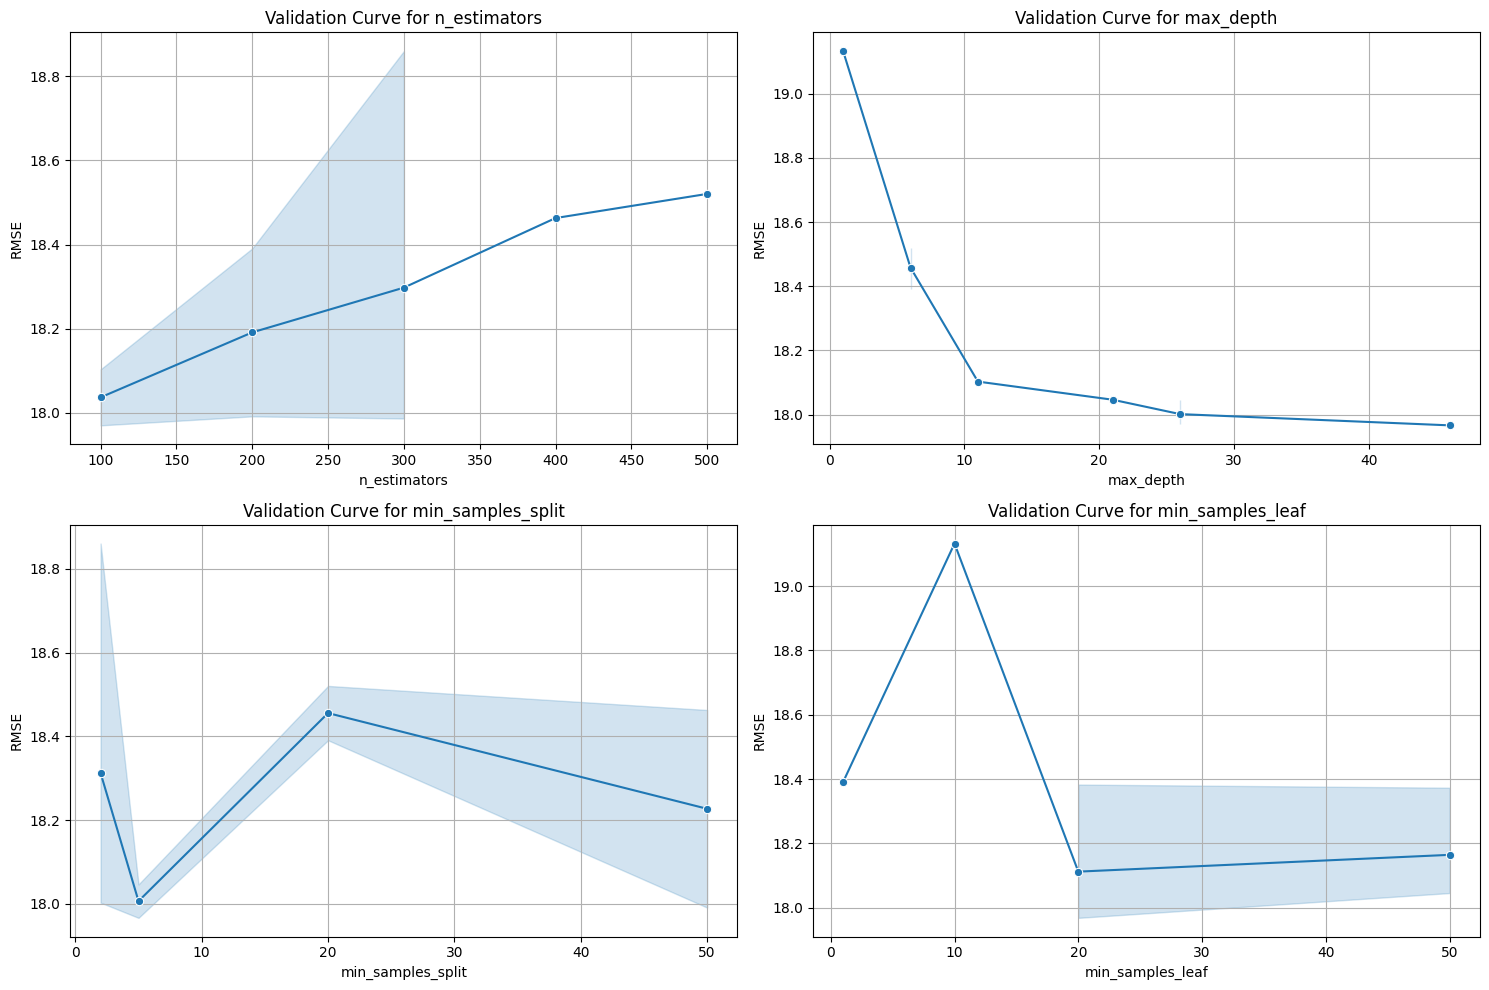

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assuming 'grid_search' is your fitted RandomizedSearchCV object
cv_results = pd.DataFrame(grid_search.cv_results_)
best_params = grid_search.best_params_

# List of parameters we want to plot, excluding 'max_features'
parameters_to_plot = ['n_estimators', 'max_depth', 'min_samples_split', 'min_samples_leaf']

# Setup the matplotlib figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes = axes.flatten()  # Flatten the array to easily iterate over it

for idx, param in enumerate(parameters_to_plot):
    # Extract the scores for the parameter across all runs
    temp_df = cv_results.loc[:, ['mean_test_score', f'param_{param}']].copy()
    temp_df['mean_test_score'] = np.sqrt(-temp_df['mean_test_score'])  # Convert to RMSE

    # Sort the DataFrame by the parameter to plot sorted lines
    temp_df.sort_values(by=f'param_{param}', inplace=True)

    # Plot the validation curve for the current parameter in its respective subplot
    sns.lineplot(data=temp_df, x=f'param_{param}', y='mean_test_score', marker='o', ax=axes[idx])

    axes[idx].set_title(f'Validation Curve for {param}')
    axes[idx].set_xlabel(param)
    axes[idx].set_ylabel('RMSE')
    axes[idx].grid(True)

# Adjust the layout so that the titles and labels don't overlap
plt.tight_layout()
plt.show()

Optimized RF Model (without PCA) Performance on test data

In [ ]:
import time
start = time.time()

random_forest_model = RandomForestRegressor(n_estimators=80, max_depth = 5, min_samples_leaf = 9, min_samples_split = 6, random_state=42)
random_forest_model.fit(X_train_rf, y_train_rf)

y_pred_rf = random_forest_model.predict(X_test_rf)
rmse_rf = mean_squared_error(y_test_rf, y_pred_rf, squared=False)

feature_importance_rf = pd.Series(random_forest_model.feature_importances_, index=X_rf.columns).sort_values(ascending=False)

duracy = time.time() - start
print('Running time: {}s'.format(duracy))

rmse_rf, feature_importance_rf

Running time: 40.778040170669556s


(18.457888392113972,
 loudness            0.609980
 instrumentalness    0.157215
 energy              0.095576
 duration_ms         0.051900
 acousticness        0.040297
 valence             0.022634
 danceability        0.011994
 tempo               0.005400
 liveness            0.003103
 speechiness         0.001899
 key                 0.000000
 mode                0.000000
 time_signature      0.000000
 dtype: float64)

Applying pca

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X_rf = spotify_data[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
                     'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
                     'duration_ms', 'time_signature']]
y_rf = spotify_data['popularity']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_rf)

pca = PCA(n_components=0.8)
X_pca = pca.fit_transform(X_scaled)

print("The proportion of explained variance:", sum(pca.explained_variance_ratio_))
print("Components used:", pca.n_components_)
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_pca, y_rf, test_size=0.2, random_state=42)

The proportion of explained variance: 0.8146165337739262
Components used: 8


Parameters Tuning after applying pca
(Please skip this when running, which takes really long time)

In [ ]:
# Setup the hyperparameter grid
X_rf = spotify_data[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
                     'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
                     'duration_ms', 'time_signature']]
y_rf = spotify_data['popularity']
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 0.33],
    'max_depth': np.arange(1, 50, 5),
    'min_samples_split': [2, 5, 10, 20, 50],
    'min_samples_leaf': [1, 10, 20, 50]
}

# Instantiate the RandomForestRegressor
rf = RandomForestRegressor(random_state=42)
# X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

start = time.time()
# Instantiate the GridSearchCV object
grid_search = RandomizedSearchCV(rf, param_grid, n_iter=20, cv=5, scoring='neg_mean_squared_error', return_train_score=True, n_jobs=-1, verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train_rf, y_train_rf)

# Getting the best combination of parameters and score
best_params = grid_search.best_params_
best_score = np.sqrt(-grid_search.best_score_)

# Training the best model on the full training set
best_rf = RandomForestRegressor(**best_params, random_state=42)
best_rf.fit(X_train_rf, y_train_rf)

# Predicting on the test set with the best model
y_pred_best = best_rf.predict(X_test_rf)
final_rmse_best = mean_squared_error(y_test_rf, y_pred_best, squared=False)

# Print the best parameters, the best RMSE from CV, and the final RMSE on the test set
print(f"Best parameters: {best_params}")
print(f"Best CV RMSE: {best_score}")
print(f"Final test set RMSE: {final_rmse_best}")

duracy = time.time() - start
print('Running time: {}s'.format(duracy))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 0.33, 'max_depth': 26}
Best CV RMSE: 18.585207926869625
Final test set RMSE: 18.55171544299359
Running time: 10914.5276927948s


Validation Plots

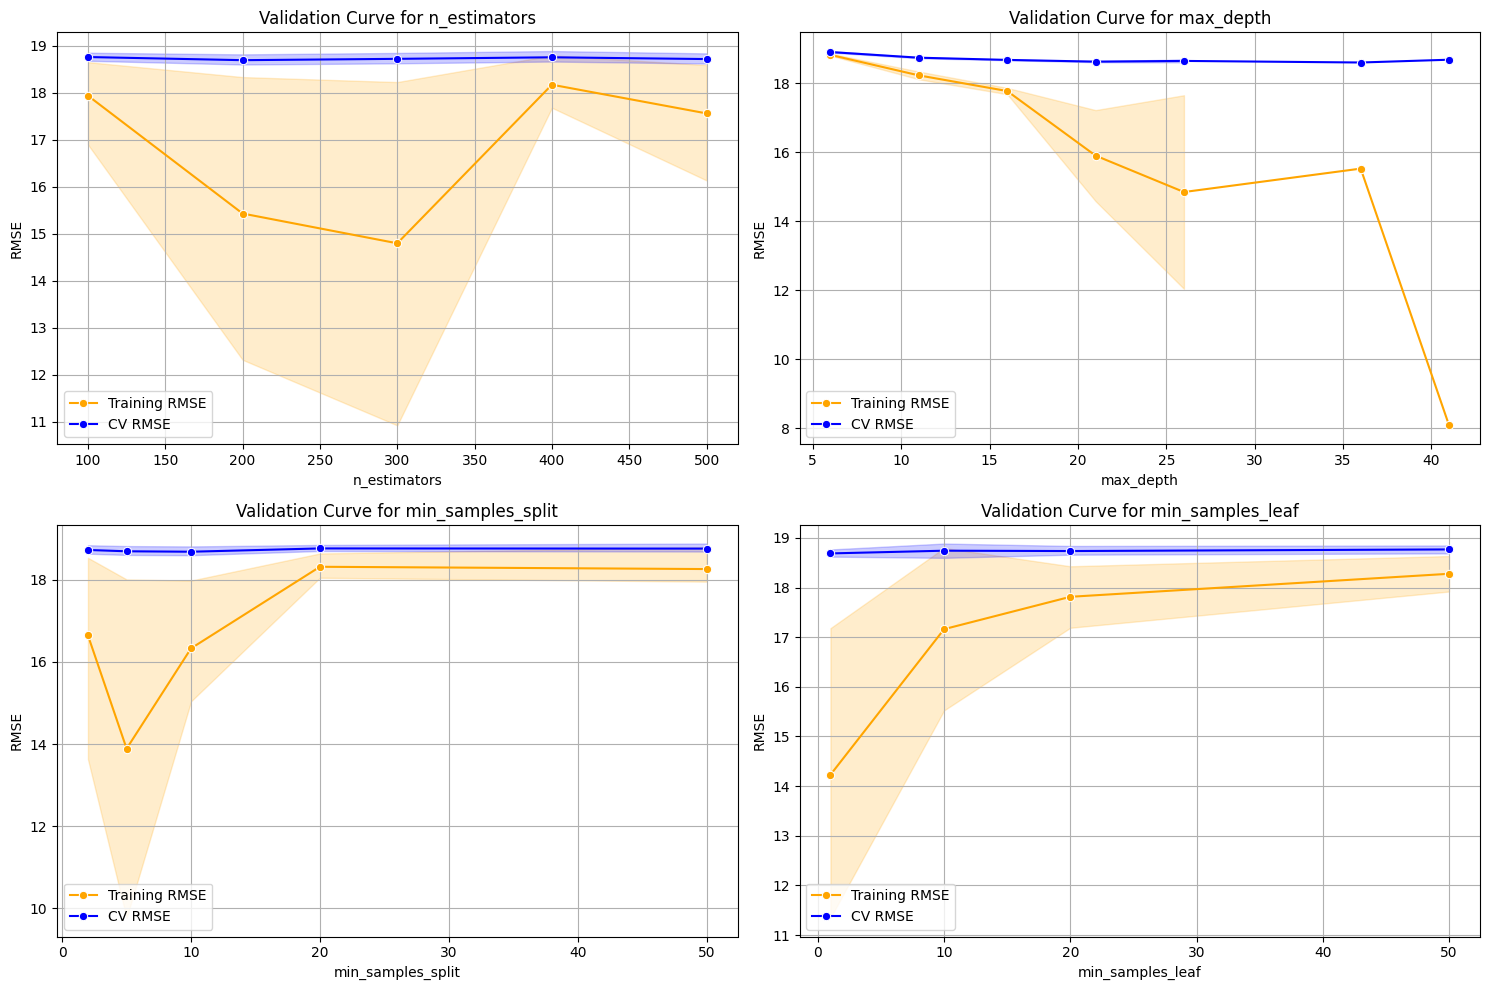

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assuming 'grid_search' is your fitted RandomizedSearchCV object
cv_results = pd.DataFrame(grid_search.cv_results_)
best_params = grid_search.best_params_

# List of parameters we want to plot, excluding 'max_features'
parameters_to_plot = ['n_estimators', 'max_depth', 'min_samples_split', 'min_samples_leaf']

# Setup the matplotlib figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes = axes.flatten()  # Flatten the array to easily iterate over it

for idx, param in enumerate(parameters_to_plot):
    # Extract the scores for the parameter across all runs
    param_col = f'param_{param}'
    temp_df = cv_results.loc[:, [param_col, 'mean_train_score', 'mean_test_score']].copy()
    temp_df['mean_train_score'] = np.sqrt(-temp_df['mean_train_score'])  # Convert to RMSE for training
    temp_df['mean_test_score'] = np.sqrt(-temp_df['mean_test_score'])  # Convert to RMSE for cross-validation

    # Sort the DataFrame by the parameter to plot sorted lines
    temp_df.sort_values(by=param_col, inplace=True)

    # Plot the validation curve for the current parameter in its respective subplot
    sns.lineplot(data=temp_df, x=param_col, y='mean_train_score', marker='o', label='Training RMSE', ax=axes[idx], color='orange')
    sns.lineplot(data=temp_df, x=param_col, y='mean_test_score', marker='o', label='CV RMSE', ax=axes[idx], color='blue')

    axes[idx].set_title(f'Validation Curve for {param}')
    axes[idx].set_xlabel(param)
    axes[idx].set_ylabel('RMSE')
    axes[idx].grid(True)
    axes[idx].legend()

# Adjust the layout so that the titles and labels don't overlap
plt.tight_layout()
plt.show()

Optimized RF Model (with PCA) Performance on test data

In [ ]:
import time
start = time.time()
random_forest_model = RandomForestRegressor(n_estimators=300, max_features = 0.33, max_depth = 26, min_samples_leaf = 1, min_samples_split = 5, random_state=42)
random_forest_model.fit(X_train_rf, y_train_rf)

y_pred_rf = random_forest_model.predict(X_test_rf)
rmse_rf = mean_squared_error(y_test_rf, y_pred_rf, squared=False)

duracy = time.time() - start
print('Running time: {}s'.format(duracy))
print(f'Test RMSE of Random Forest (PCA): {rmse_rf}')

Running time: 159.68064045906067s
Test RMSE of Random Forest (PCA): 18.55171544299359


SVR

In [ ]:
# Define features and target
X = spotify_data[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
          'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
          'duration_ms', 'time_signature']]
y = spotify_data['popularity']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the SVR model within a pipeline that includes scaling
svr_pipeline = make_pipeline(StandardScaler(), SVR(kernel='rbf', C=1.0, epsilon=0.2))
svr_pipeline.fit(X_train, y_train)

# Predict and evaluate
y_pred = svr_pipeline.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R² Score: {r2}')

RMSE: 18.272194150738915
R² Score: 0.13935870721608257


SVR with feature engineering

In [ ]:
# Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Split the polynomial features data
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Define different kernels to test
kernels = ['linear', 'poly', 'rbf']
results = []

for kernel in kernels:
    svr_poly_kernel = make_pipeline(StandardScaler(), SVR(kernel=kernel, C=1.0, epsilon=0.2))
    svr_poly_kernel.fit(X_train_poly, y_train_poly)
    y_pred_poly = svr_poly_kernel.predict(X_test_poly)
    rmse_poly = mean_squared_error(y_test_poly, y_pred_poly, squared=False)
    results.append((kernel, rmse_poly))

results

[('linear', 18.51516016588695),
 ('poly', 19.05403379142187),
 ('rbf', 18.26347118816785)]